In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from utils import plots, filters

In [5]:
# load the netcdf dataset
nh3_nc = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

In [6]:
# bounding box
lat_bounds = slice(44.75, 46.65)
lon_bounds = slice(8.5, 11.25)

In [7]:
# load the nh3 layer in the region specified by the bounding box
nh3 = nh3_nc.agl.sel(lat=lat_bounds, lon=lon_bounds)

In [8]:
shape = gpd.read_file('../resources/regione/regione_2015.shp')
shape.head()

CODICE               NOME    SHAPE_AREA     SHAPE_LEN  \
0     03  REGIONE LOMBARDIA  2.386795e+10  1.535219e+06   

                                            geometry  
0  MULTIPOLYGON (((460668.530 5015498.348, 460677...

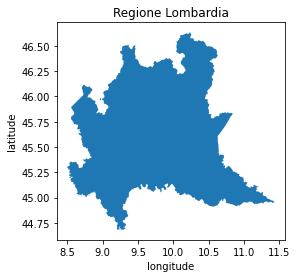

In [9]:
plots.plot_shapefile(shape, epsg=4326, title='Regione Lombardia', xlabel='longitude', ylabel='latitude')

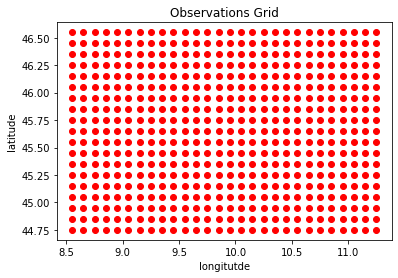

<Figure size 432x288 with 0 Axes>

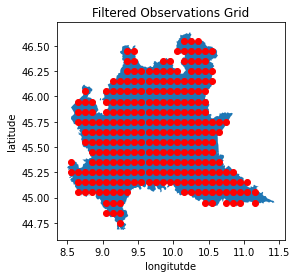

In [10]:
# filter the time series inside the shapefile
data = filters.filter_data_on_shapefile(nh3, lats = nh3.lat, lons = nh3.lon, shp=shape, plot_grid=True, plot_filter=True)

In [11]:
lats = nh3.lat.to_series().tolist()
lons = nh3.lon.to_series().tolist()
times = nh3.time.to_series().tolist()

In [12]:
filtered_nh3 = xr.DataArray(data, coords=[times, lats , lons], dims=['time', 'lat', 'lon'])   
filtered_nh3.attrs = nh3.attrs

In [13]:
filtered_nh3_dataset = xr.Dataset(
    {
    'agl': (['time', 'lat', 'lon'], data)
    },
    coords = {
        'lat': lats,
        'lon': lons,
        'time': times
    }
)

In [16]:
filtered_nh3_dataset.to_netcdf('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc')